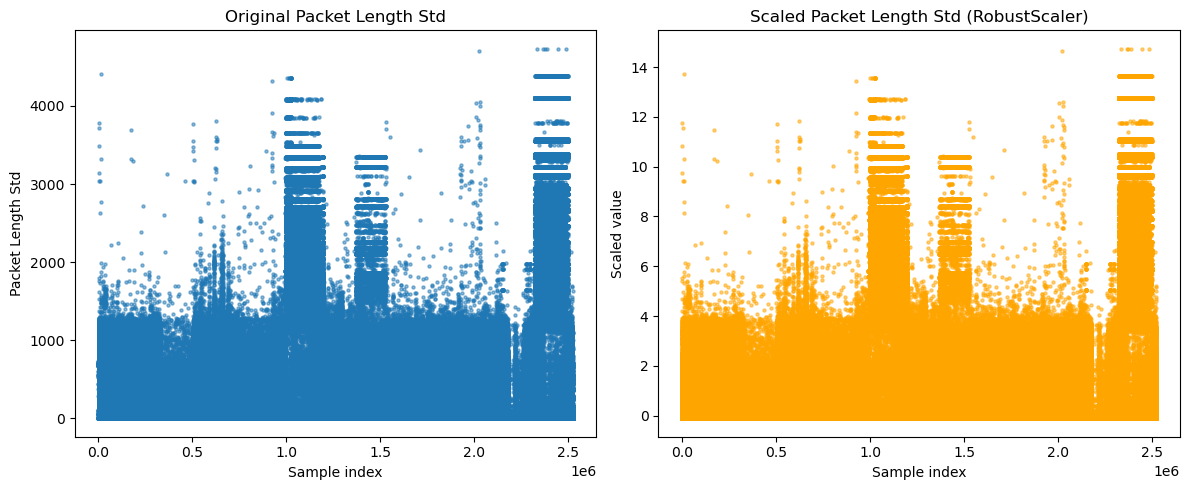

In [8]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load dataset
df1 = pd.read_csv('/home/wahba/Documents/dataset/processed/2_cicids2017_benign_attack.csv')

selected_features = [
    # Flow-level
    'Flow Duration',
    'Flow Packets/s',
    'Flow Bytes/s',
    'Flow IAT Mean',
    'Flow IAT Max',
    'Flow IAT Std',
    
    # Forward features
    'Fwd Header Length',
    'Fwd IAT Total',
    'Fwd IAT Mean',
    'Fwd IAT Max',
    'Fwd IAT Std',
    'Fwd Packet Length Min',
    'Fwd Packet Length Max',
    'Fwd Packet Length Mean',
    'Fwd Packet Length Std',
    'Subflow Fwd Bytes',
    'Total Fwd Packets',
    'Total Length of Fwd Packets',
    
    # Backward features
    'Bwd Header Length',
    'Bwd Packet Length Min',
    'Bwd Packet Length Max',
    'Bwd Packet Length Std',
    'Bwd Packets/s',
    'Init_Win_bytes_backward',
    
    # Packet-level
    'Packet Length Mean',
    'Packet Length Std',
    'Packet Length Variance',
    'Average Packet Size',
    'PSH Flag Count',
    'Init_Win_bytes_forward',
    'Max Packet Length',
]

# Keep only the selected features
df1 = df1[selected_features]

# Load the RobustScaler
scaler = joblib.load('/home/wahba/Documents/model/binary_classification/robust_scaler.joblib')

# Scale the dataset
df1_scaled = scaler.transform(df1)

# Get the column index for 'Packet Length Std'
col_index = df1.columns.get_loc('Packet Length Std')

# Scatter plot before and after scaling
plt.figure(figsize=(12, 5))

# Original
plt.subplot(1, 2, 1)
plt.scatter(range(len(df1)), df1['Packet Length Std'], s=5, alpha=0.5)
plt.title('Original Packet Length Std')
plt.xlabel('Sample index')
plt.ylabel('Packet Length Std')

# Scaled
plt.subplot(1, 2, 2)
plt.scatter(range(len(df1_scaled)), df1_scaled[:, col_index], s=5, alpha=0.5, color='orange')
plt.title('Scaled Packet Length Std (RobustScaler)')
plt.xlabel('Sample index')
plt.ylabel('Scaled value')

plt.tight_layout()
plt.show()


/home/wahba/miniconda3/envs/ml1/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


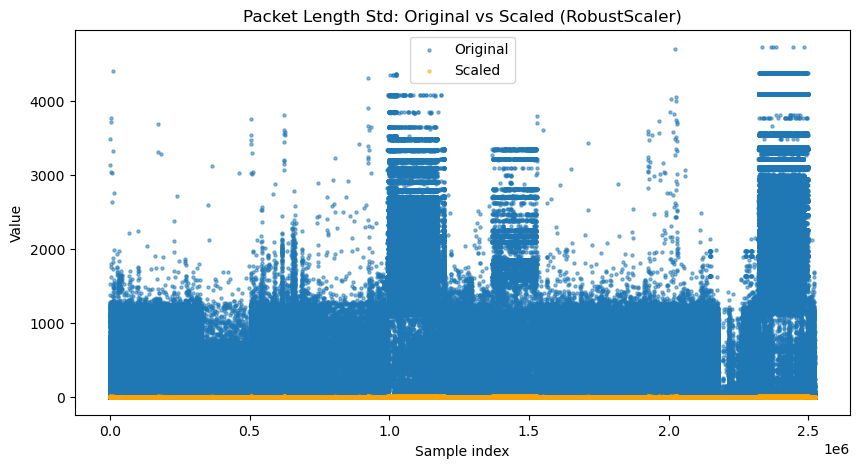

In [9]:
# Get the column index for 'Packet Length Std'
col_index = df1.columns.get_loc('Packet Length Std')

# Scatter plot overlay
plt.figure(figsize=(10, 5))
plt.scatter(range(len(df1)), df1['Packet Length Std'], s=5, alpha=0.5, label='Original')
plt.scatter(range(len(df1_scaled)), df1_scaled[:, col_index], s=5, alpha=0.5, label='Scaled', color='orange')
plt.title('Packet Length Std: Original vs Scaled (RobustScaler)')
plt.xlabel('Sample index')
plt.ylabel('Value')
plt.legend()
plt.show()
